<a href="https://colab.research.google.com/github/anzalshaikh27/Travel-Insurance-Prediction/blob/main/ML_DataCleaning_and_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**
*Context*:
A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters.

In [37]:
#installing required packages
!pip install eli5
!pip install fancyimpute

In [38]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


In [39]:
# Reading dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/anzalshaikh27/Travel-Insurance-Prediction/main/TravelInsurancePrediction.csv"
)
data


,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


1) What are the data types? (Only numeric and categorical)

-->
"Index", "Age", "AnnualIncome", "FamilyMembers", and "TravelInsurance" columns have numeric data types (int64).

"Employment Type", "GraduateOrNot", "FrequentFlyer", and "EverTravelledAbroad" columns have categorical data (object)


In [40]:
#defining datatype
data.dtypes

Index                   int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

2) Are there missing values?

--> There are no null values in the dataset as sum() method prints count as 0 for each column.

In [41]:
# removing null values
#isnull() method to check for missing values in each column and sum() method is applied to count the missing values in each column.
data.isnull().sum()


Index                  0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [42]:
#removing extra white spaces
#data['GraduateOrNot'] = data['GraduateOrNot'].str.strip()
#data['FrequentFlyer'] = data['FrequentFlyer'].str.strip()
#data['EverTravelledAbroad'] = data['EverTravelledAbroad'].str.strip()
data['Employment Type'] = data['Employment Type'].str.strip()

#converting categorical values to numeric
data["GraduateOrNot"]= data["GraduateOrNot"].map({"No" :0, "Yes" : 1})
data["FrequentFlyer"]= data["FrequentFlyer"].map({"No" :0, "Yes" : 1})
data["EverTravelledAbroad"]= data["EverTravelledAbroad"].map({"No" :0, "Yes" : 1})
data["Employment Type"]= data["Employment Type"].map({"Government Sector" :0, "Private Sector/Self Employed" : 1})

#defining categorical and numerical values
cats = []
nums = []
for i in data.columns:
  if data[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

data

cats =  []
nums =  ['Index', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,1,1,1500000,4,0,1,1,1
1983,1983,28,1,1,1750000,5,1,0,1,0
1984,1984,28,1,1,1150000,6,1,0,0,0
1985,1985,34,1,1,1000000,6,0,1,1,1


9) Do the ranges of the predictor variables make sense?

--> By examining the data points that fall outside the whiskers of the box plot there is no potential outliers present as seen below. Therefore  the ranges of the predictor variables make sense as it fall inside the whiskers of the box plot.

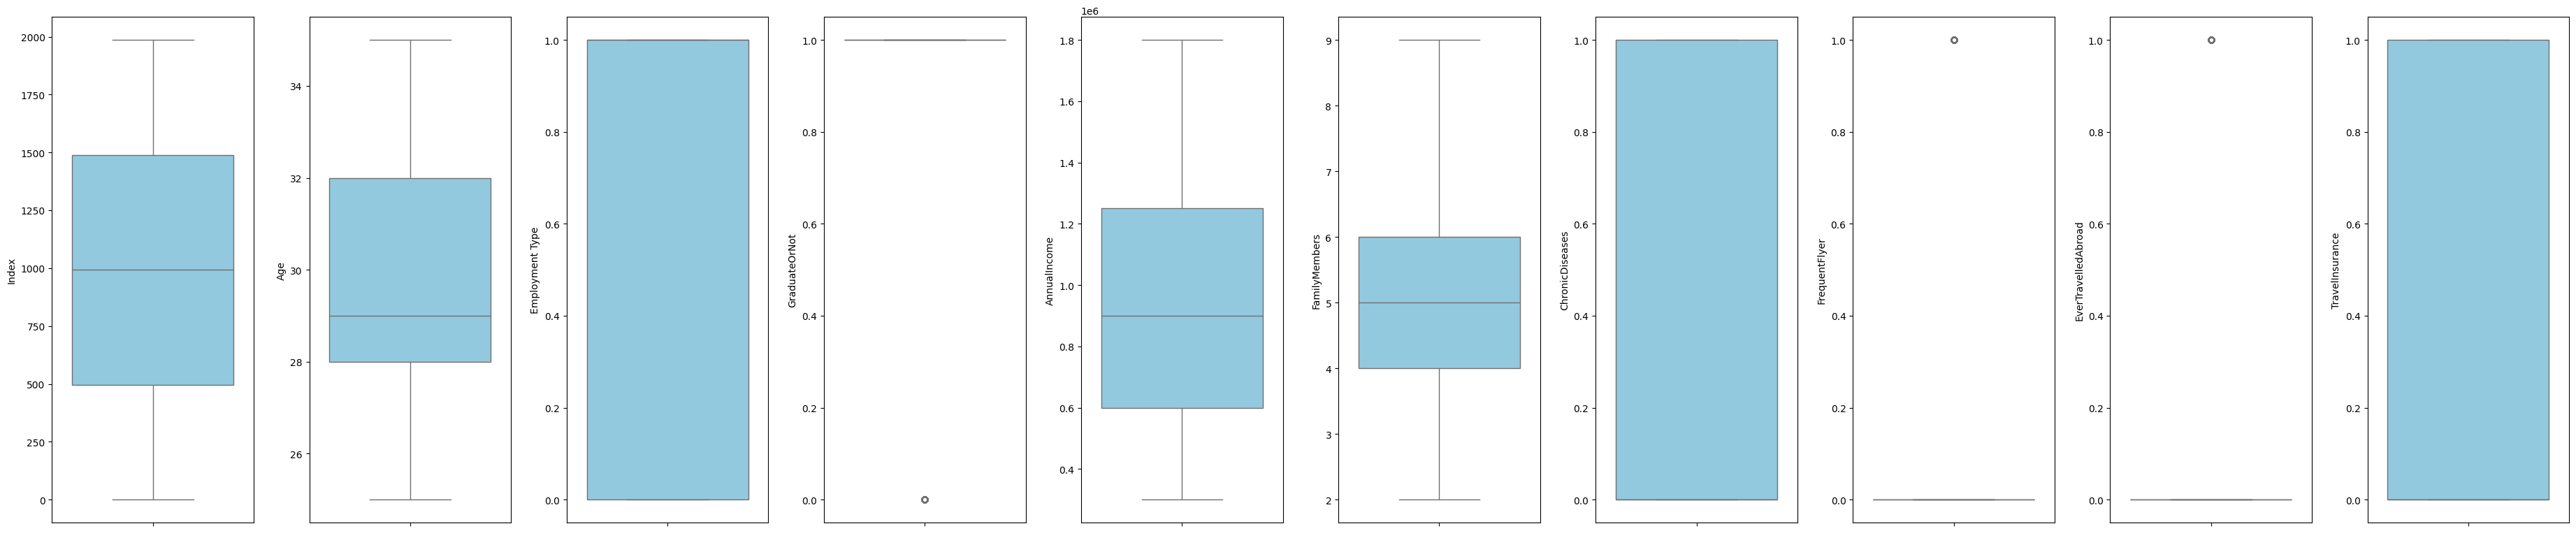

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,573.741812,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,0.000000,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,496.500000,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,993.000000,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,1986.000000,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#checking outliers values
plt.figure(figsize=(40,30))
for i in range(0, len(nums)) :
  plt.subplot(4,11, i+2)
  sns.boxplot (y=data [nums[i]], color='skyblue', orient='v')
plt.tight_layout ()
plt.show()

#method in pandas DataFrame which provides a summary of descriptive statistics for numeric columns.
data.describe()

3) What are the likely distributions of the numeric variables?

-->
To determine the likely distributions of the numeric variables in a DataFrame, I have used various statistical methods and visualization techniques.

a) Histogram (Plotting histograms and density plots for each numeric variable provides a visual representation of their distributions. Histograms show the frequency or count of values within predefined bins or intervals)

b) QQ plots (Quantile-quantile (QQ) plots compare the quantiles of the observed data with those of a theoretical distribution (e.g., normal distribution))

--------------------------------------------------------------------------------

10) What are the distributions of the predictor variables?

--> To determine the distributions of predictor variables by visualizing their histograms or density plots as below:

--> Density plots provides a smooth estimate of the probability density function (PDF) of a continuous random variable.

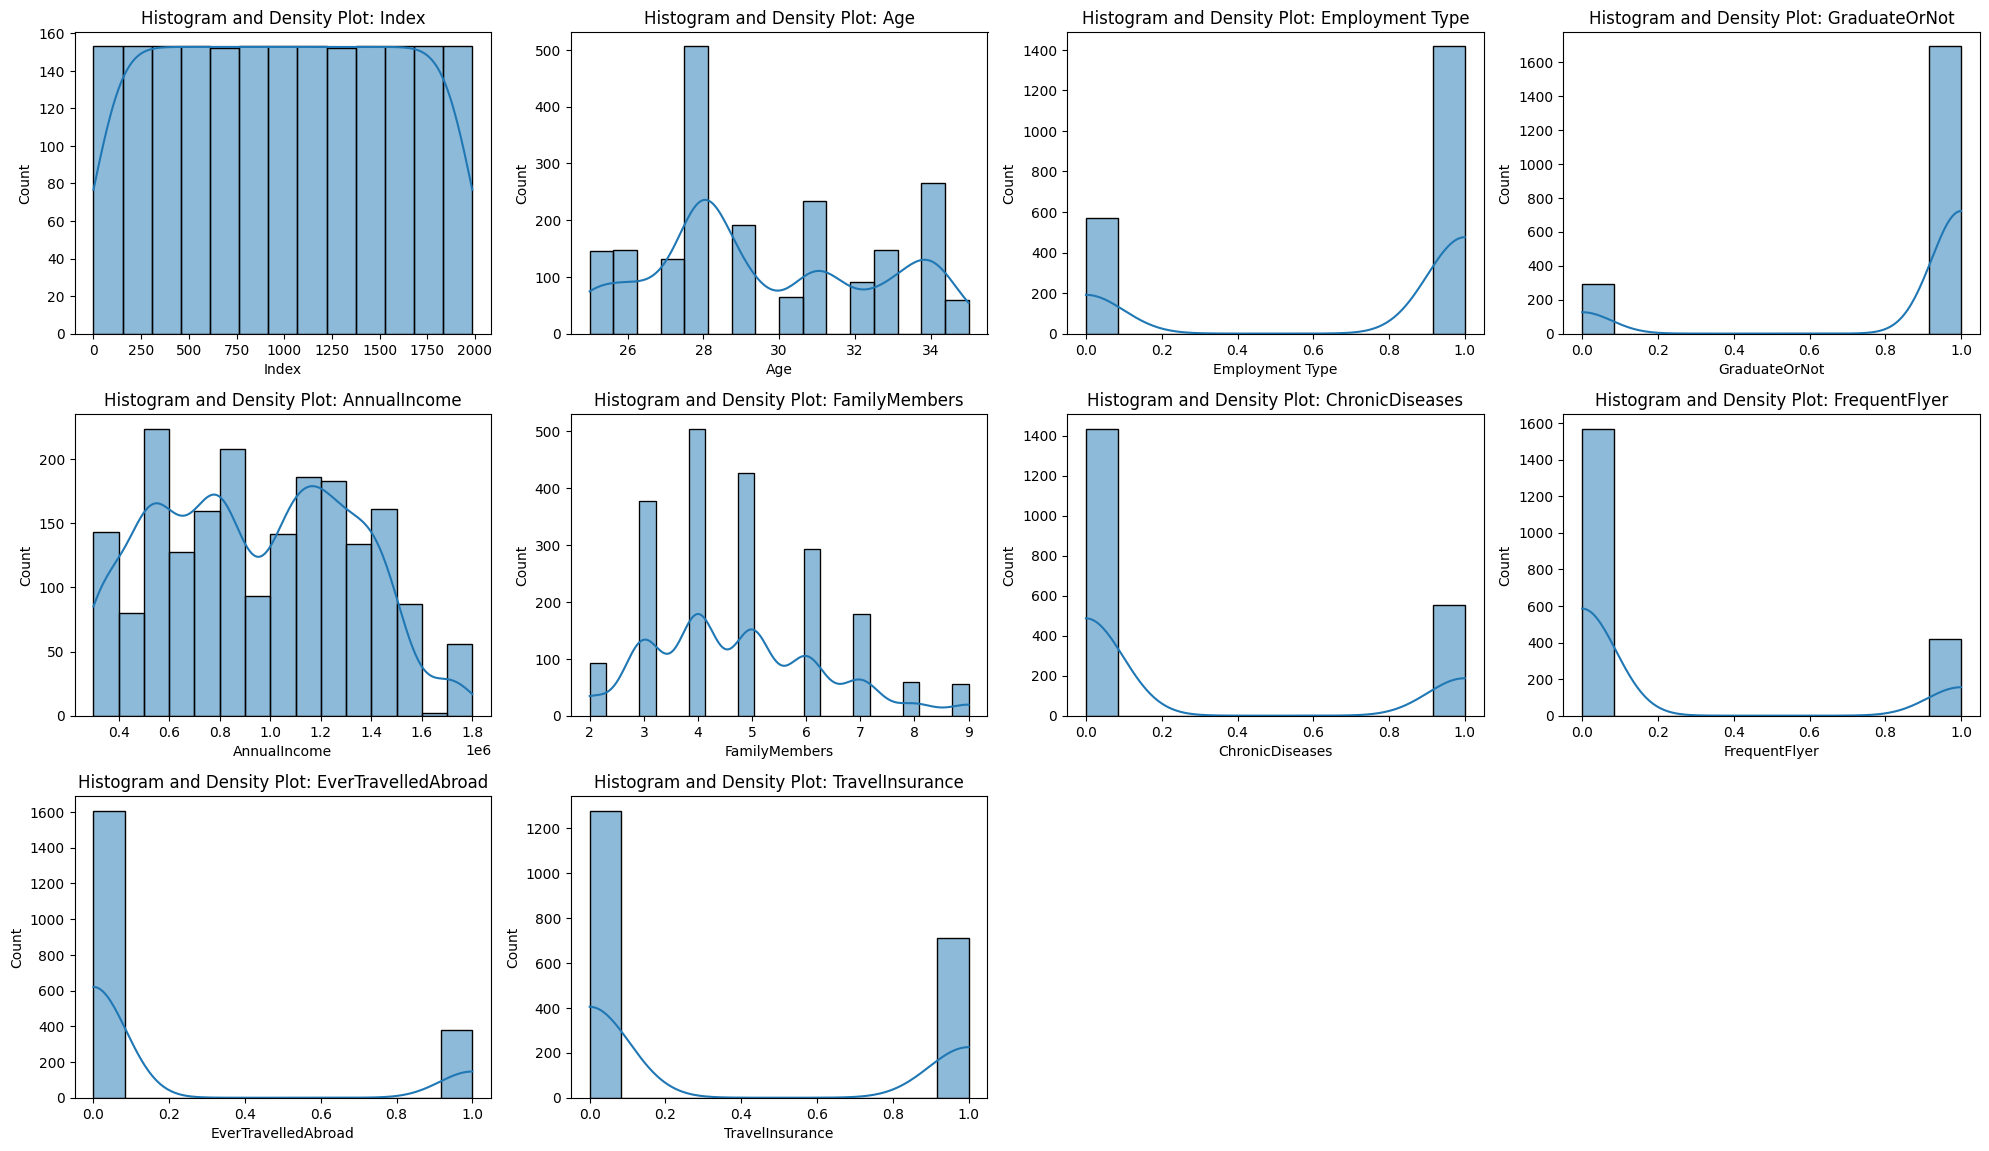

In [44]:
#Histogram

# Plotting histograms and density plots for all numeric variables

# Filtering out the numeric variables for the density plot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

# Enumerating through the numeric columns and plotting histograms and density plots
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram and Density Plot: {column}')

plt.tight_layout()  # Adjusts plot to ensure it fits into the figure area
plt.show()  # Displays the plot


<Figure size 800x500 with 0 Axes>

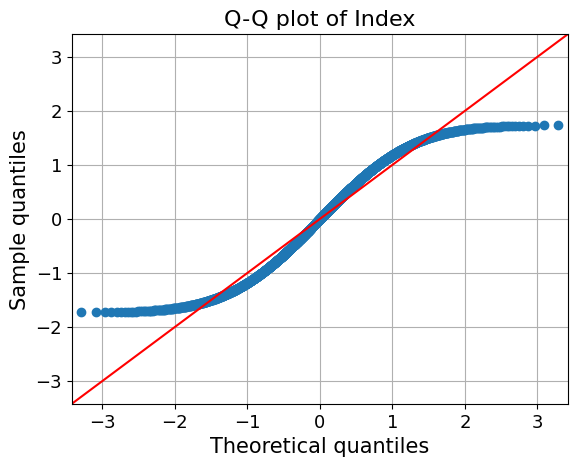

<Figure size 800x500 with 0 Axes>

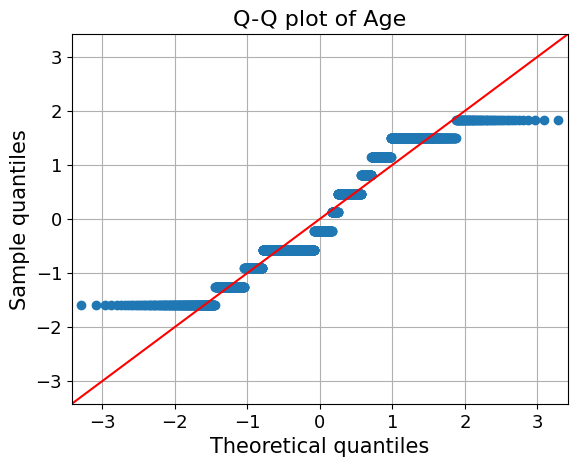

<Figure size 800x500 with 0 Axes>

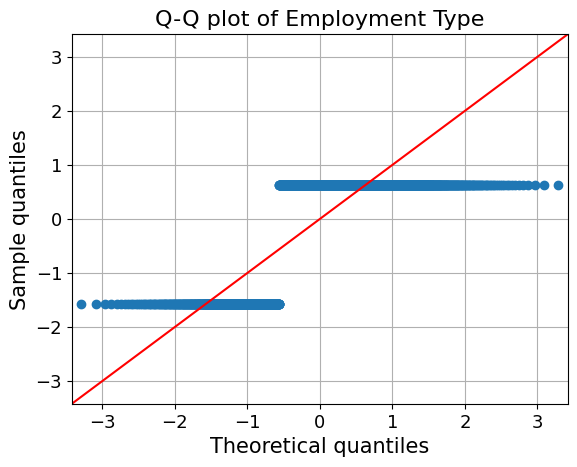

<Figure size 800x500 with 0 Axes>

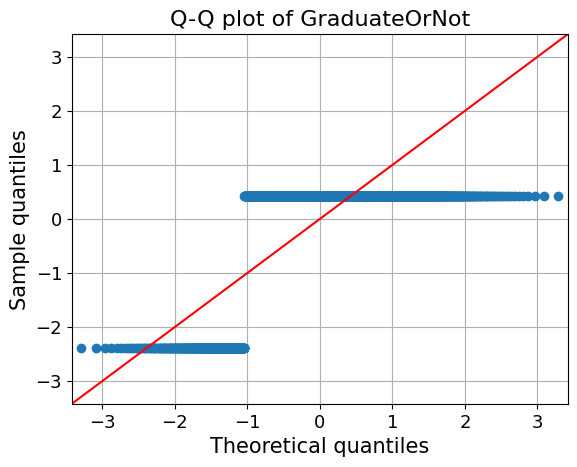

<Figure size 800x500 with 0 Axes>

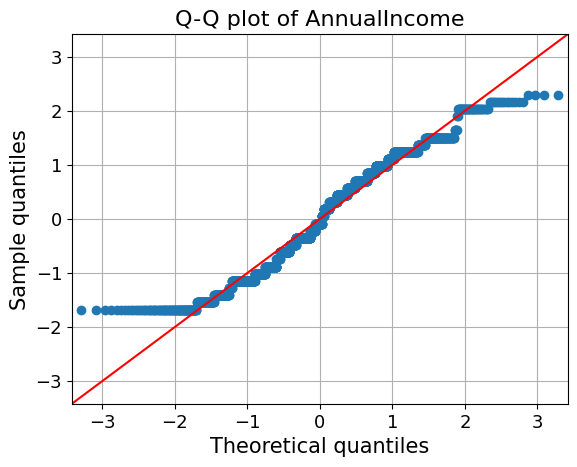

<Figure size 800x500 with 0 Axes>

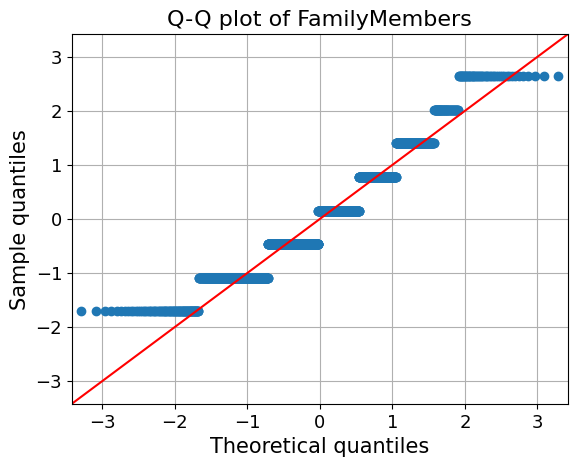

<Figure size 800x500 with 0 Axes>

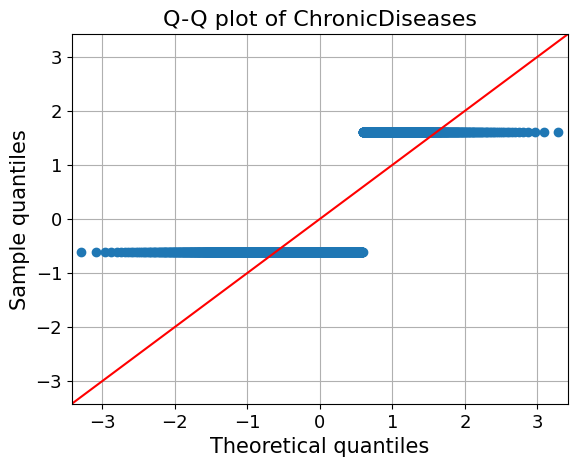

<Figure size 800x500 with 0 Axes>

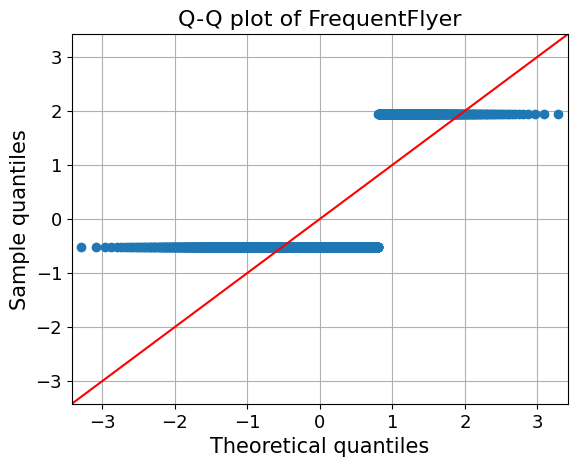

<Figure size 800x500 with 0 Axes>

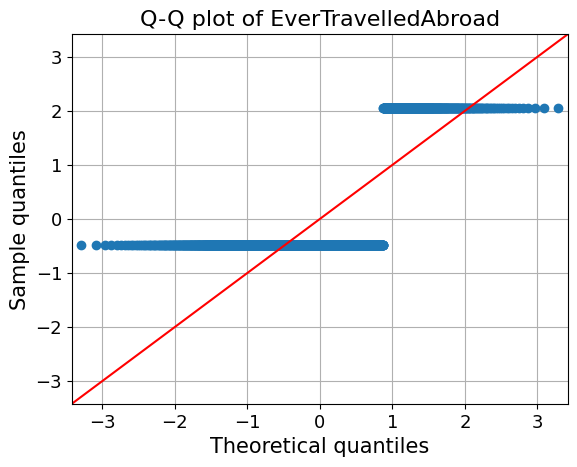

<Figure size 800x500 with 0 Axes>

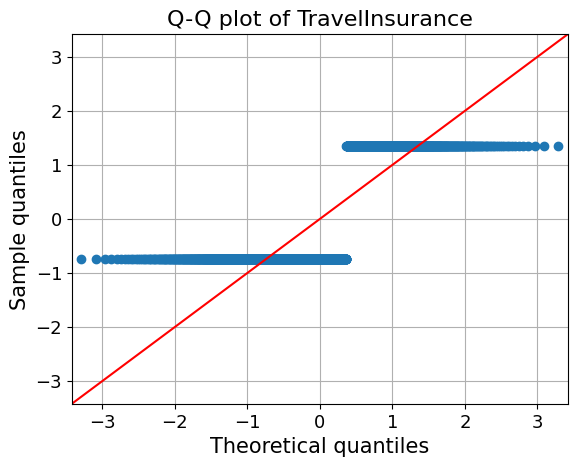

In [45]:
#QQ plot

# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

# Remove non-numeric or categorical columns from the DataFrame
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Drop any rows with missing or invalid values in the numeric columns
data_numeric = data[numeric_columns].dropna()

# Plot Q-Q plots for each numeric column
for column in data_numeric.columns:
    plt.figure(figsize=(8, 5))
    qqplot(data_numeric[column], line='45', fit=True)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {column}', fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()


In [46]:
# Excluding the ID column
data = data.drop('Index', axis=1)



<Axes: >

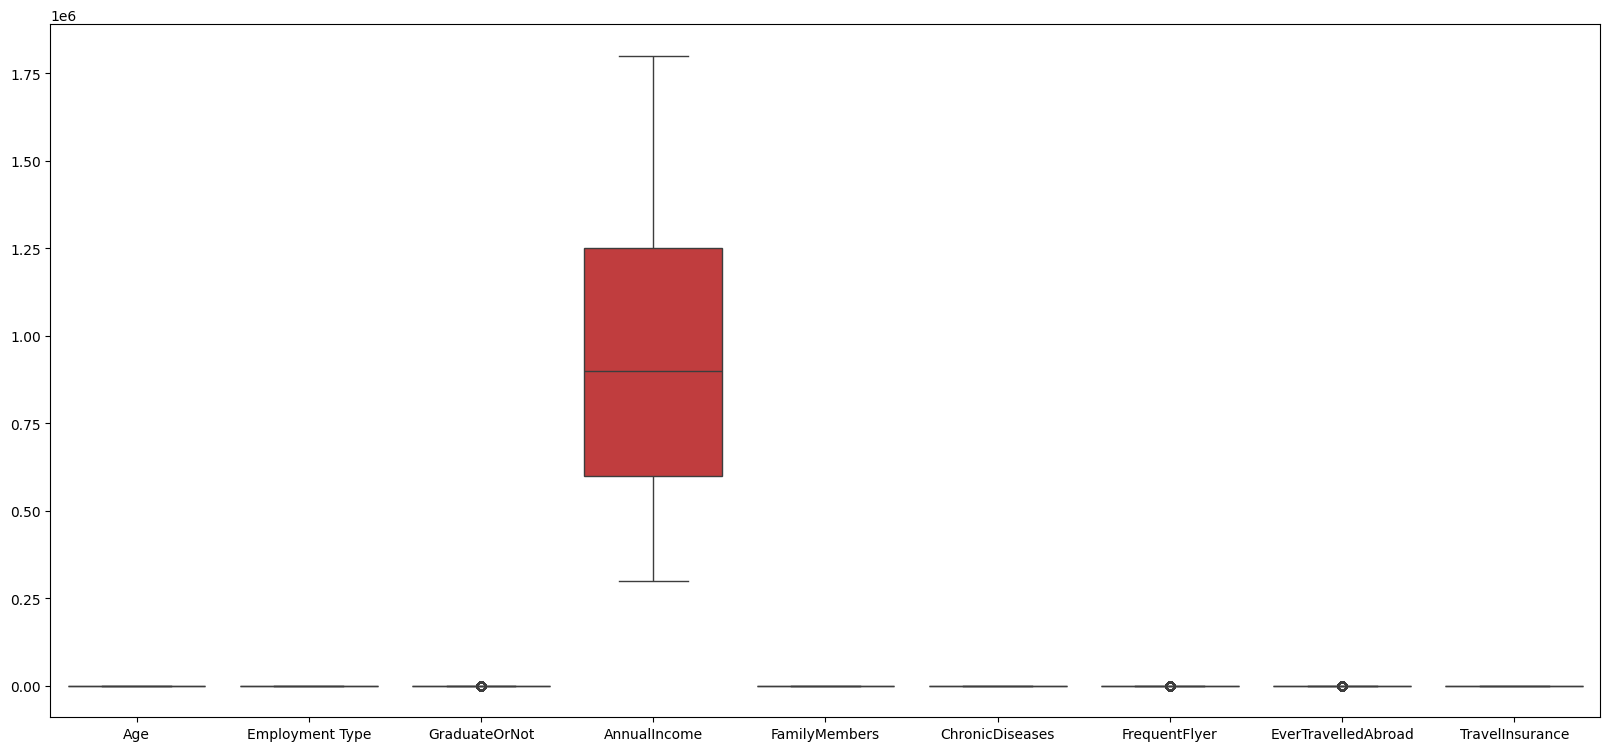

In [47]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

In [48]:
# Creating binary vaiables

data = pd.get_dummies(data)

# Normalizing the data in the annual income column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["AnnualIncome"]].values.astype(float)
x2 = data[["Age"]].values.astype(float)
x3 = data[["FamilyMembers"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
x2_scaled = min_max_scaler.fit_transform(x2)
x3_scaled = min_max_scaler.fit_transform(x3)

# Run the normalizer on the dataframe
data[["AnnualIncome"]] = pd.DataFrame(x_scaled)
data[["Age"]] = pd.DataFrame(x2_scaled)
data[["FamilyMembers"]] = pd.DataFrame(x3_scaled)


In [49]:
# data after normalizing and feature creation

data.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0,0


<Axes: >

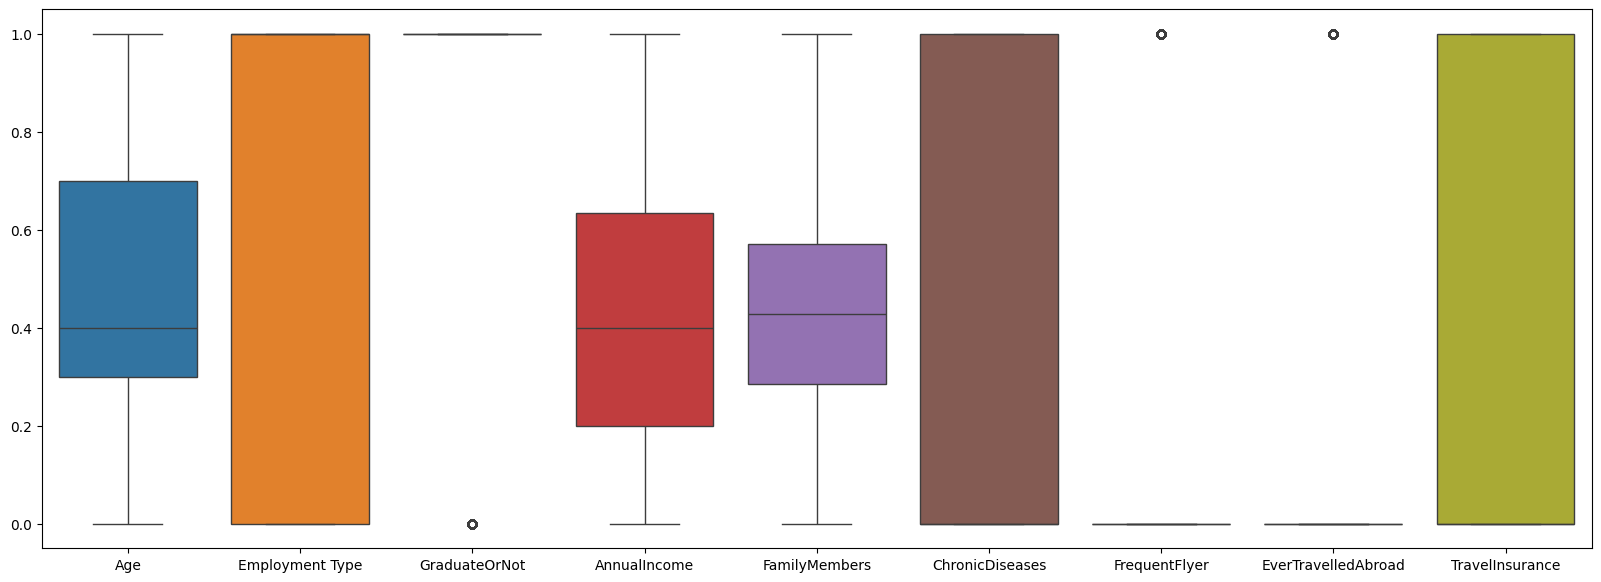

In [50]:
# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)



4) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

-->
**Target - TravelInsurance**

Comparing the results obtained from all four methods:


a) Random Forest Feature Importance

b) Univariate Feature Selection using the chi-squared test

c) Correlation Analysis with the target variable (TravelInsurance)

d) Recursive Feature Elimination (RFE) with Support Vector Machine (SVM) classifier.

# a) **Random Forest Feature Importance:**

Selected Features:

'AnnualIncome'
'FamilyMembers'
'Age'
'EverTravelledAbroad'
'FrequentFlyer'
'ChronicDiseases'
'Employment Type'
'GraduateOrNot'
Top 3 Features (based on importance):
'AnnualIncome' (0.421)
'FamilyMembers' (0.194)
'Age' (0.172)

--> **Accuracy with All Features: 0.80**

# b)**Univariate Feature Selection (Chi-squared Test):**

Selected Features:

'AnnualIncome'
'FrequentFlyer'
'EverTravelledAbroad'

--> **Accuracy with Selected Features: 0.80**


# c) **Correlation Analysis with Target Variable (TravelInsurance):**

--> Correlation with Target Variable (Descending Order):
'EverTravelledAbroad' (0.433)
'AnnualIncome' (0.397)
'FrequentFlyer' (0.232)

**Selected Features based on Correlation Magnitude:
'EverTravelledAbroad'
'AnnualIncome'
'FrequentFlyer'**


# d) **Recursive Feature Elimination (RFE) with SVM Classifier:**

Selected Features:

'Age'
'AnnualIncome'
'EverTravelledAbroad'

--> **Accuracy with 3 Selected Features: 0.75**

Comparison:

i) 'AnnualIncome' and 'EverTravelledAbroad' were consistently identified as important features across all methods, although their rankings differed slightly.

ii)The Random Forest Feature Importance and Univariate Feature Selection methods provided insights into feature importance based on model performance, while Correlation Analysis focused on the strength of linear relationships with the target variable.

iii) Recursive Feature Elimination (RFE) with SVM Classifier selected features based on their importance in conjunction with the performance of the model.
Despite using different approaches, all methods provided valuable insights into feature importance and contributed to understanding the factors influencing travel insurance uptake.

               Feature  Importance
3         AnnualIncome    0.421318
4        FamilyMembers    0.194014
0                  Age    0.172426
7  EverTravelledAbroad    0.104809
6        FrequentFlyer    0.037731
5      ChronicDiseases    0.032161
1      Employment Type    0.021190
2        GraduateOrNot    0.016352


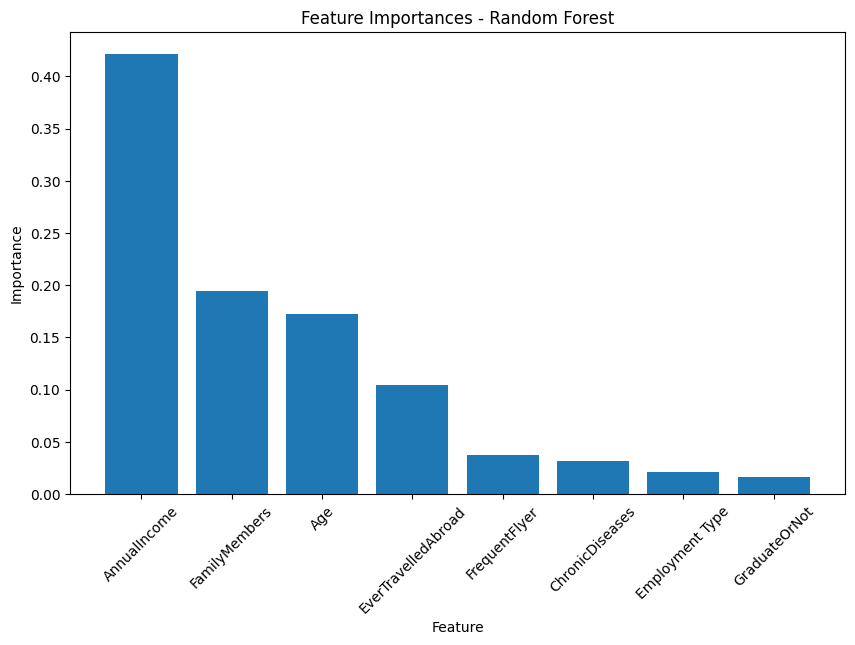

In [51]:

#Method 1: (Feature Importance Techniques: Tree-based models)

#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model to the data
rf_classifier.fit(X, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


7) Is the predictor variables independent of all the other predictor variables?

--> To check if predictor variables are independent of each other, I have calculated the correlation matrix between the predictor variables. If the correlation coefficients are close to zero, it suggests that the variables are independent. However, this method only captures linear relationships, and other relationships might exist.

-->

a) "EverTravelledAbroad" has a moderate positive correlation with "TravelInsurance" (0.433183).

b) "AnnualIncome" also has a moderate positive correlation with "TravelInsurance" (0.396763).

c) "FrequentFlyer" has a weak positive correlation with "TravelInsurance" (0.232103).

d) "Employment Type," "FamilyMembers," "Age," "GraduateOrNot," and "ChronicDiseases" have even weaker positive correlations with "TravelInsurance."

--> calculating the correlation matrix for all predictor variables is done using a heatmap as below:

In [52]:

#Method 2:
#Correlation Matrix with HeatMap (Pearson correlation coefficient)

# checking the correlation between all the features in the data

correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['TravelInsurance'].abs().sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)


Correlation with target variable:
TravelInsurance        1.000000
EverTravelledAbroad    0.433183
AnnualIncome           0.396763
FrequentFlyer          0.232103
Employment Type        0.147847
FamilyMembers          0.079909
Age                    0.061060
GraduateOrNot          0.018934
ChronicDiseases        0.018190
Name: TravelInsurance, dtype: float64


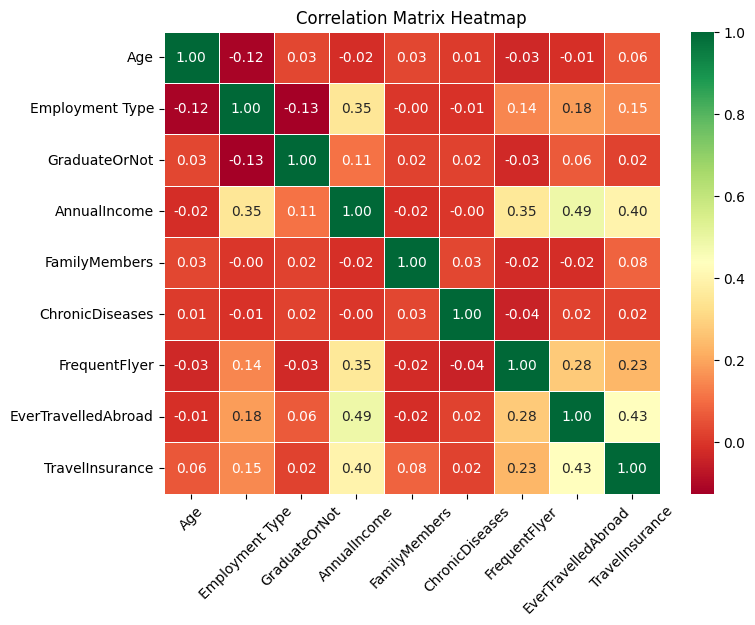

In [53]:
# the heat map of the correlation

#seaborn's heatmap() function to plot the correlation matrix as a heatmap.
#The annot=True parameter adds numerical annotations to each cell
# cmap='coolwarm' sets the color map
# fmt=".2f" formats the annotations to two decimal places
#linewidths=0.5 adds narrow lines between cells for better readability.

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [54]:
#Method 3 : Univariate feature selection (chi-squared (χ²) test) (SelectKBest class)

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SelectKBest with chi-squared test to select the top 3 features
k_best_features = 3
selector = SelectKBest(chi2, k=k_best_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print(f'Selected Features: {selected_feature_names}')

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model to the selected features
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with {k_best_features} selected features: {accuracy:.2f}')


Selected Features: Index(['AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad'], dtype='object')
Accuracy with 3 selected features: 0.80


In [55]:

#Method 4: Wrapper Methods: Recursive Feature Elimination (RFE):

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel="linear")

# Create RFE model with SVM classifier
num_features_to_select = 3
rfe = RFE(estimator=svm_classifier, n_features_to_select=num_features_to_select)

# Fit RFE to training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get the names of the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(f'Selected Features: {selected_features}')

# Fit SVM classifier on the selected features
svm_classifier.fit(X_train_rfe, y_train)

# Transform the test set based on the selected features
X_test_rfe = rfe.transform(X_test)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_rfe)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with {num_features_to_select} selected features: {accuracy:.2f}')


Selected Features: Index(['Age', 'AnnualIncome', 'EverTravelledAbroad'], dtype='object')
Accuracy with 3 selected features: 0.75


 5) Which independent variables have missing data? How much?

 --> There are no missing values in any of the independent variables.

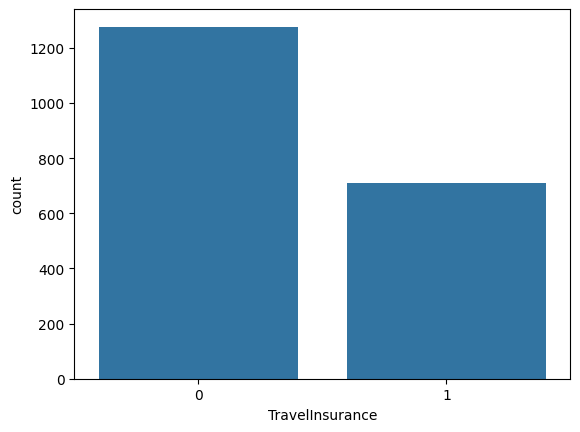

TravelInsurance
0    1277
1     710
dtype: int64


In [56]:
# Check if dataset is balanced

sns.countplot(data=data, x='TravelInsurance')
plt.show()

size = data.groupby("TravelInsurance").size()
print(size)

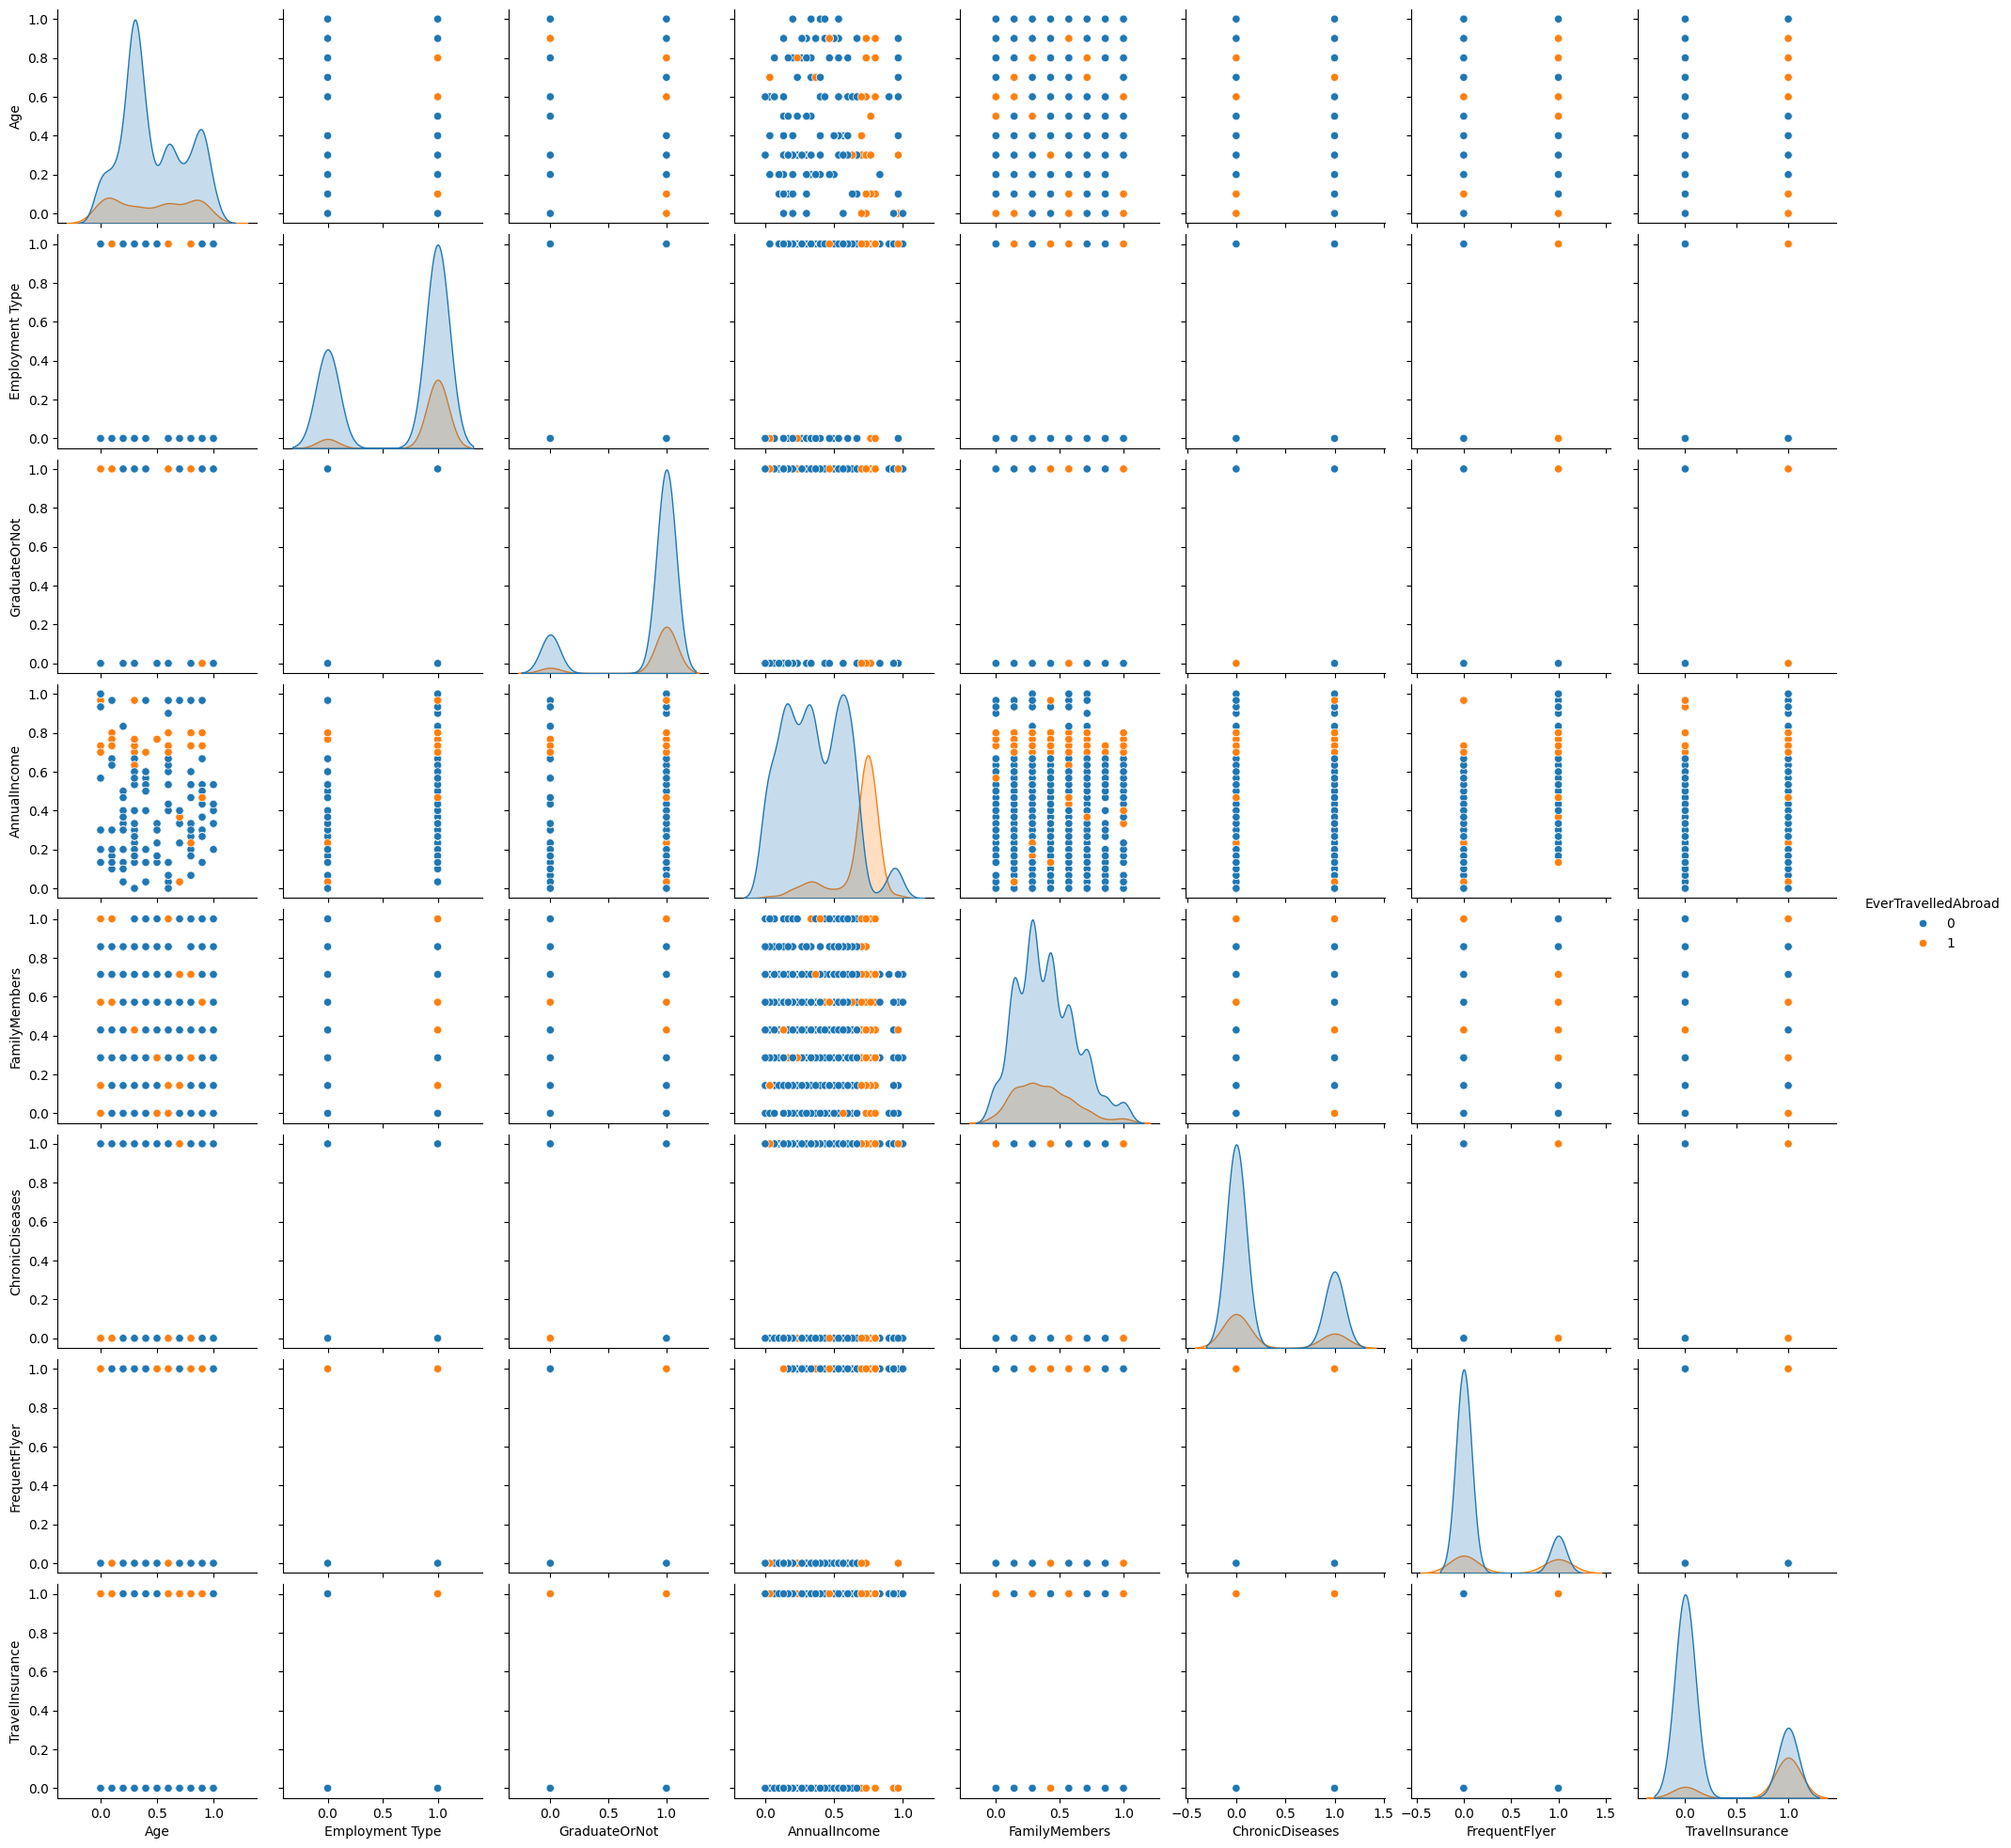

In [57]:
# pair plot to check the colinearity
#sns.pairplot(data)
sns.pairplot(data, hue='EverTravelledAbroad')
plt.show()


8) Which predictor variables are the most important?

--> Conducting statistical tests, such as linear regression with p-values, can help identify significant predictor variables. After interpreting the coefficients and associated p-values to determine the significance of each predictor variable in predicting the target variable,

 --> "**Age**," "**FamilyMembers**," "**AnnualIncome**," "**GraduateOrNot**," "**FrequentFlyer**," and "**EverTravelledAbroad**" have p-values less than 0.05, indicating that they are statistically significant predictors of "TravelInsurance."

--> Conversely, "**ChronicDiseases**" and "**Employment Type**" have p-values greater than 0.05 and are not statistically significant predictors in this model.









In [58]:
#Method 5:
# Using OLS(Ordinary Least Squares regression) for finding the p value to check the significant features
#p-value is a measure that helps determine the significance of an observed result
# p-values below 0.05 are often considered statistically significant.

import statsmodels.api as sm

model = sm.OLS(
    data["TravelInsurance"],
    data[
        [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TravelInsurance   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              266.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                   1.42e-307
Time:                        01:19:23   Log-Likelihood:                         -1070.6
No. Observations:                1987   AIC:                                      2157.
Df Residuals:                    1979   BIC:                                      2202.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                     0.1094      0.029      3.718      0.000       0.052       0.167
FamilyMembers           0.1780      0.037      4.758      0.000       0.105       0.251
ChronicDiseases         0.0118      0.021      0.573      0.567      -0.029       0.052
AnnualIncome            0.4248      0.046      9.310      0.000       0.335       0.514
Employment Type         0.0043      0.021      0.210      0.834      -0.036       0.045
GraduateOrNot          -0.0433      0.022     -1.978      0.048      -0.086      -0.000
FrequentFlyer           0.0823      0.025      3.326      0.001       0.034       0.131
EverTravelledAbroad     0.3752      0.027     13.782      0.000       0.322       0.429
==============================================================================
Omnibus:                      168.669   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.712
Skew:                           0.700   Prob(JB):                     3.48e-40
Kurtosis:                       2.514   Cond. No.                         7.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) Do the training and test sets have the same data?

--> Training and test sets do not have the same data.


In [59]:
#Train ,Validation and Test split

from sklearn.model_selection import train_test_split

X = data[
    [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
    ]
]

y = data["TravelInsurance"]

# Spliting data into Training 70%, Validation set 15% and Test set 15%
# X_t and y_t are temp data

# Splitting data into training and temporary data (70% training, 30% temporary data)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting temporary data into validation and final test data (15% validation, 15% test)
X_validation, X_train, y_validation, y_train = train_test_split(X_train_temp, y_train_temp, test_size=0.15, random_state=42)

# X_train, X_test are  training and test sets respectively

# Convert DataFrames to sets
X_train_set = set(tuple(row) for row in X_train.to_numpy())
X_test_set = set(tuple(row) for row in X_test.to_numpy())

# Check if training and test sets have the same data
if X_train_set == X_test_set:
    print("Training and test sets have the same data.")
else:
    print("Training and test sets do not have the same data.")

Training and test sets do not have the same data.


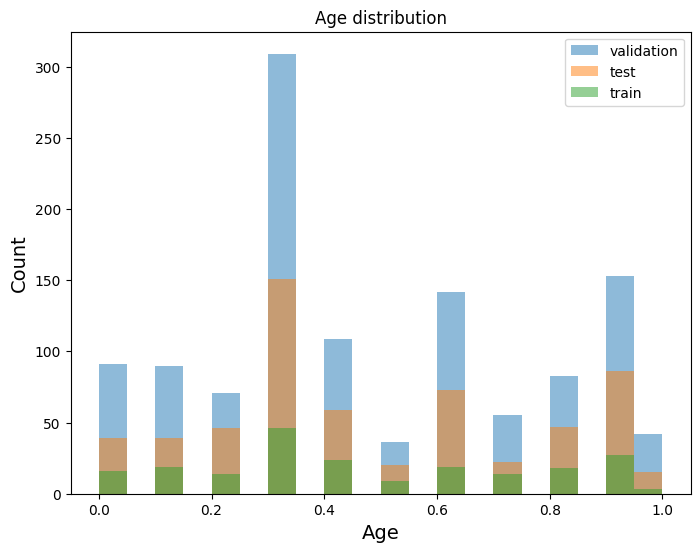

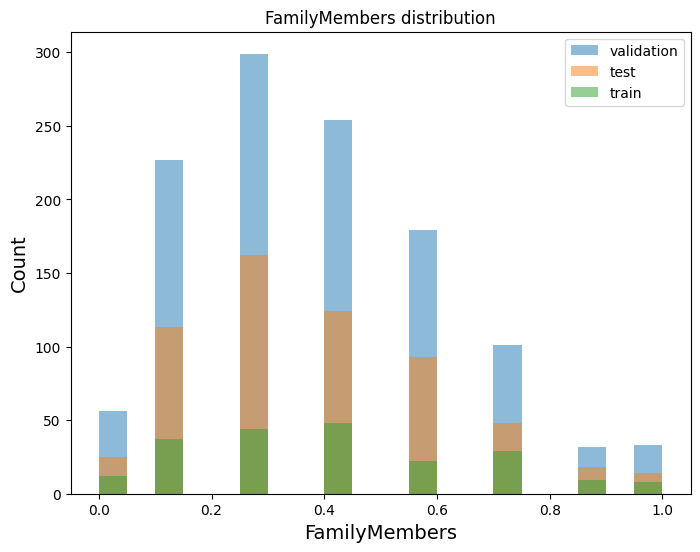

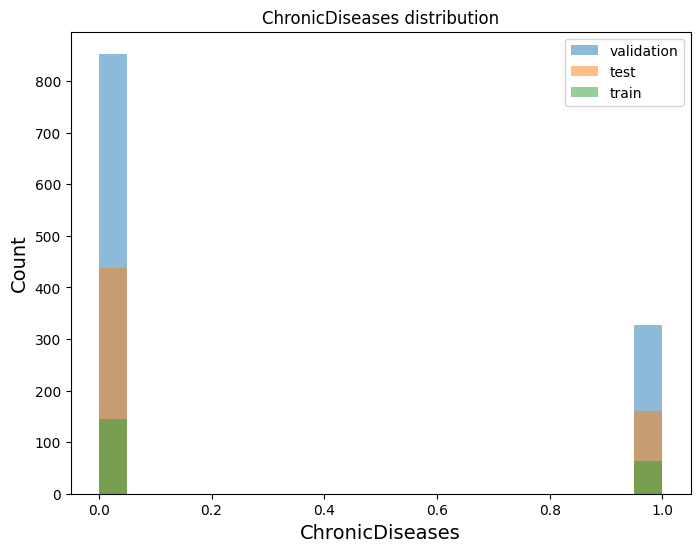

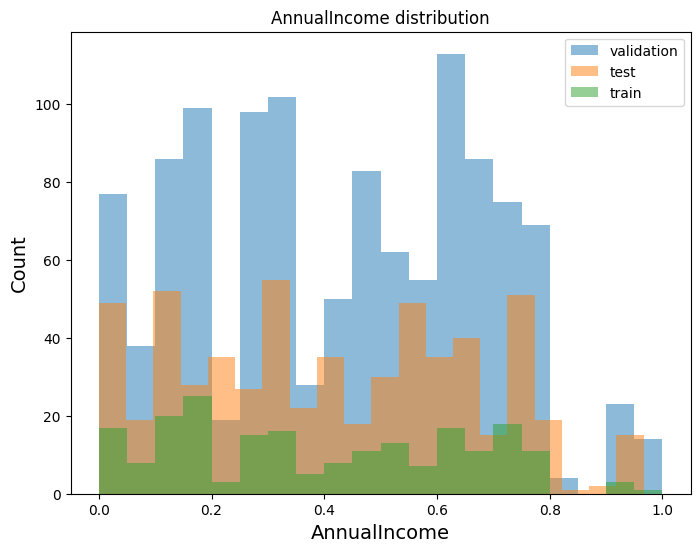

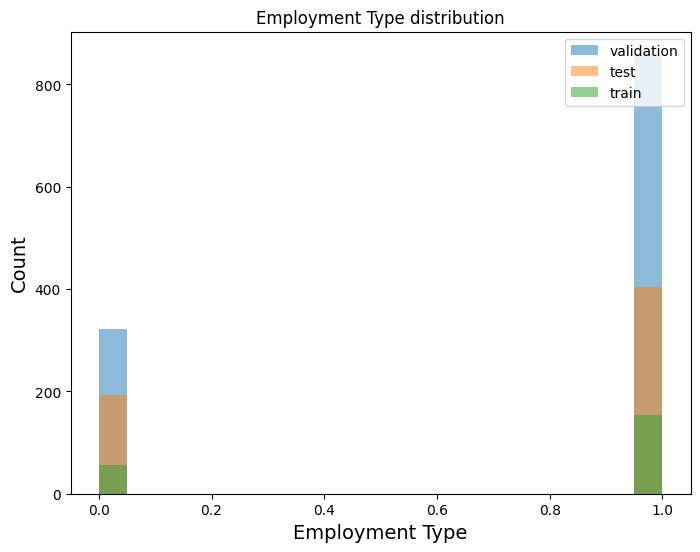

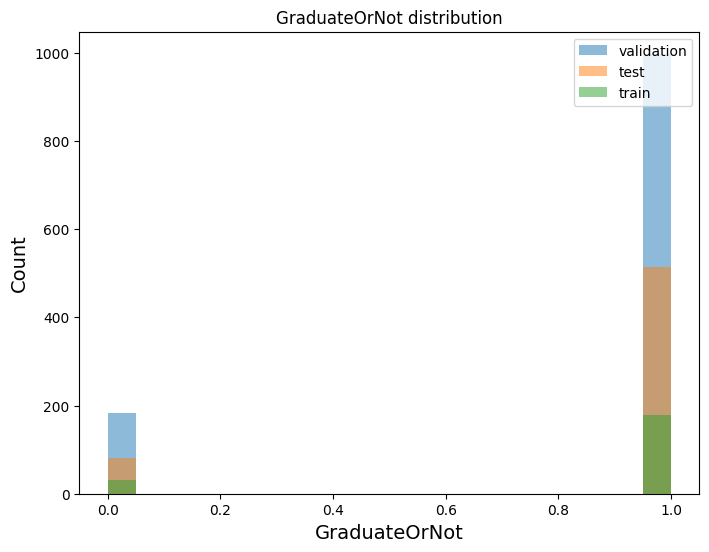

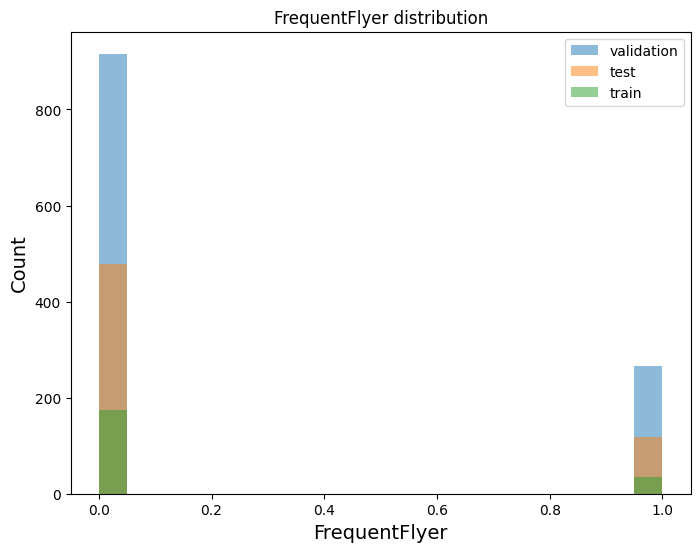

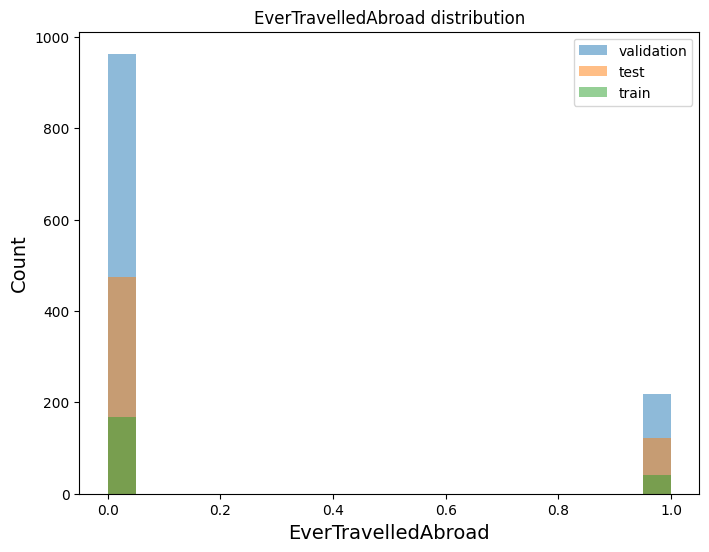

In [60]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
    ]
]

X_val_plot = X_validation[
    [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
    ]
]

X_train_plot = X_train[
    [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [61]:
#Method 6: Linear Regression

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [62]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.17
Coefficient of determination: 0.29
R^2 score on tarining set = 0.28735936072109647


In [64]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.18
Coefficient of determination: 0.21
R^2 score on test set = 0.20812718958364973


In [65]:
# Make predictions using the validation set
y_pred = regr.predict(X_validation)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_validation, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_validation, y_pred))
r2_val = r2_score(y_validation, y_pred)
print("R^2 score on validation set =", r2_val)


Mean squared error: 0.17
Coefficient of determination: 0.25
R^2 score on validation set = 0.24503093108472218


In [66]:
# Understanding the important features
#The feature "EverTravelledAbroad" has a weight of 0.1771 with an uncertainty of ± 0.0409.

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())



Weight,Feature
0.1771 ± 0.0409,EverTravelledAbroad
0.0421 ± 0.0165,AnnualIncome
0.0176 ± 0.0101,FamilyMembers
0.0163 ± 0.0105,Age
0.0106 ± 0.0158,FrequentFlyer
0.0021 ± 0.0047,Employment Type
0.0007 ± 0.0028,ChronicDiseases
-0.0033 ± 0.0015,GraduateOrNot


11) Remove outliers and keep outliers (does if have an effect of the final predictive model)

--> There is no effect of the final predictive model after and before training it as their is no potential outliers:

Mean Squared Error with outliers: 0.18138851731340558

Mean Squared Error without outliers: 0.18138851731340558


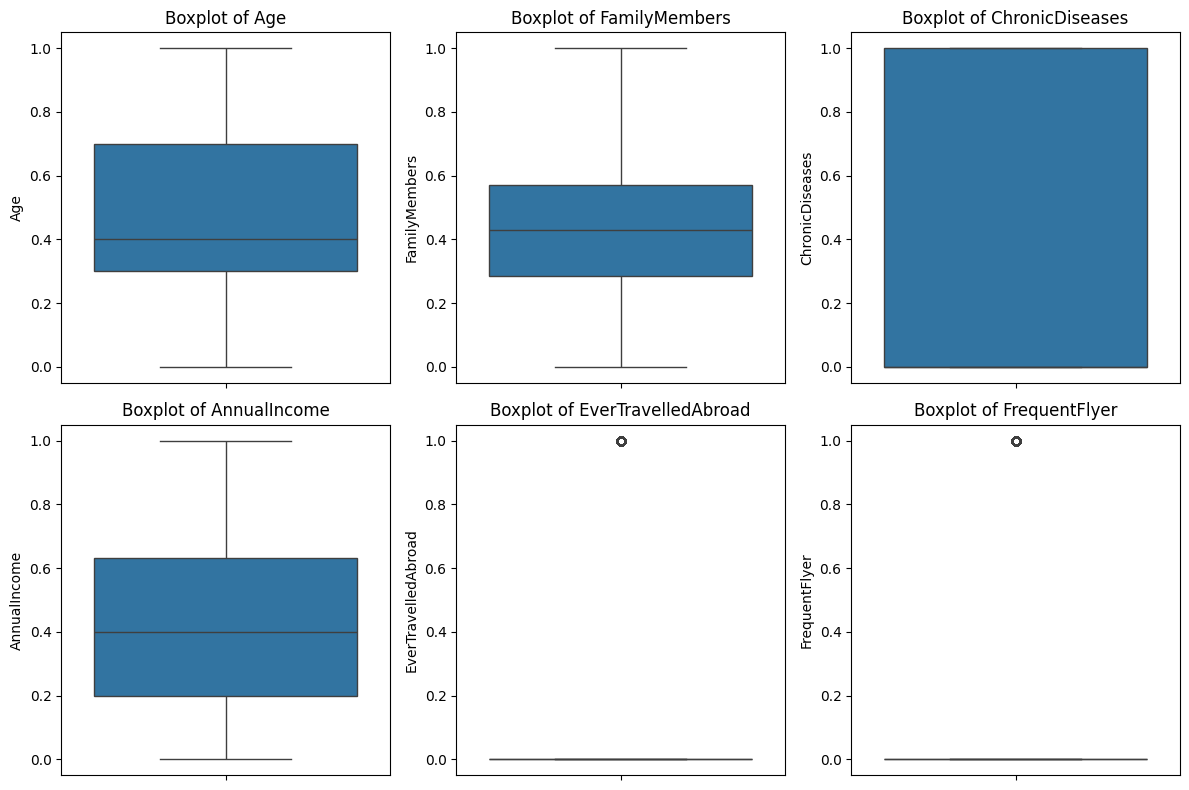

In [67]:
#Adding outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Define the predictor variables
predictor_variables = [
    "Age",
    "FamilyMembers",
    "ChronicDiseases",
    "AnnualIncome",
    "EverTravelledAbroad",
    "FrequentFlyer"
]

# Plot box plots to visualize outliers
plt.figure(figsize=(12, 8))
for i, variable in enumerate(predictor_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[variable])
    plt.title(f'Boxplot of {variable}')
plt.tight_layout()
plt.show()





In [68]:
# removing outliers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the dataset into predictor variables (X) and target variable (y)
X = data[predictor_variables]
y = data["TravelInsurance"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model without removing outliers
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)

# Train a linear regression model after removing outliers
# Define a function to remove outliers based on z-scores
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[(z_scores.abs() < threshold).all(axis=1)]

# Remove outliers from the training set
X_train_no_outliers = remove_outliers_zscore(X_train)
y_train_no_outliers = y_train[X_train.index.isin(X_train_no_outliers.index)]

# Train the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set after removing outliers
y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_without_outliers = mean_squared_error(y_test, y_pred_no_outliers)

print("Mean Squared Error with outliers:", mse_with_outliers)
print("Mean Squared Error without outliers:", mse_without_outliers)



Mean Squared Error with outliers: 0.18138851731340558
Mean Squared Error without outliers: 0.18138851731340558


12) Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.calculate the accuracy and a confusion matrix.


-->

**Imputation methods used:**

1) Simple Imputation (mean)

2) k-Nearest Neighbors Imputation

3) Iterative Imputation

***Summary***:

a) Missing Percentage: 1.0%

With only 1% of the data missing, all three imputation methods performed quite well:

--> Simple Imputation achieved an accuracy of **80.65%**, correctly classifying 321 out of 398 instances.

--> k-NN Imputation achieved a slightly higher accuracy of **81.41%**, correctly classifying 324 out of 398 instances.

--> Iterative Imputation achieved the same accuracy as Simple Imputation, with **80.65%** accuracy and correctly classifying 321 out of 398 instances.


b) Missing Percentage: 5.0%

With 5% of the data missing, the performance remained consistent, although there were slight variations:

--> Simple Imputation achieved an accuracy of 80.40%, correctly classifying 320 out of 398 instances.

--> k-NN Imputation achieved a slightly higher accuracy of 80.90%, correctly classifying 321 out of 398 instances.

--> Iterative Imputation showed the best performance with an accuracy of 82.66%, correctly classifying 329 out of 398 instances.

c) Missing Percentage: 10.0%

With 10% of the data missing, the performance decreased slightly for all methods:

--> Simple Imputation achieved an accuracy of 79.15%, correctly classifying 315 out of 398 instances.

--> k-NN Imputation achieved a slightly lower accuracy of 78.64%, correctly classifying 313 out of 398 instances.

--> Iterative Imputation showed the best performance again with an accuracy of 81.41%, correctly classifying 324 out of 398 instances.

The confusion matrices reveal that as the missing percentage increased, there were more discrepancies in the predictions, especially in correctly identifying true positive and true negative instances.

Overall, while all three imputation methods demonstrated reasonable performance, **Iterative Imputation** consistently showed the highest accuracy across different missing percentages.

--> overall accuracy of the model is calculated as (TP + TN) / (TP + TN + FP + FN), indicating how often the model is correct.

[[TN  FP]

 [FN  TP]]

 -------------------------------------------------------------------------------

1) Mean Absolute Error (MAE):

The MAE measures the average absolute difference between the predicted values and the true values. The MAE of 0.1859 indicates that, on average, the predictions are off by approximately 0.1859 units from the true values.

2)Mean Absolute Percentage Error (MAPE):

The MAPE measures the average percentage difference between the predicted values and the true values, relative to the true values. With a MAPE of 44.6809%, it suggests that, on average, the predictions deviate by approximately 44.6809% from the true values.

--> These metrics provide a quantitative assessment of the accuracy of the predictions. A lower MAE and MAPE indicate better accuracy, suggesting that the predictions are closer to the true values.

--------------------------------------------------------------------------------



In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from fancyimpute import KNN, IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate missing values in X_train
np.random.seed(42)
missing_percentage = [0.01, 0.05, 0.1]

for percentage in missing_percentage:
    missing_mask_train = np.random.rand(*X_train.shape) < percentage
    X_train_missing = X_train.copy()
    X_train_missing[missing_mask_train] = np.nan

    print(f"Missing Percentage: {percentage * 100}%")

    # Method 1: Simple Imputation (mean)
    imputer = SimpleImputer(strategy='mean')
    X_train_simple_imputed = imputer.fit_transform(X_train_missing)

    # Method 2: k-Nearest Neighbors Imputation
    X_train_knn_imputed = KNN(k=5).fit_transform(X_train_missing)

    # Method 3: Iterative Imputation
    X_train_iterative_imputed = IterativeImputer(random_state=42).fit_transform(X_train_missing)

    # Applying the same missing mask to the test set
    missing_mask_test = np.random.rand(*X_test.shape) < percentage
    X_test_missing = X_test.copy()
    X_test_missing[missing_mask_test] = np.nan

    # Printing imputation method and check accuracy on the test set
    imputation_methods = ['Simple Imputation', 'k-NN Imputation', 'Iterative Imputation']
    imputed_datasets = [
        X_train_simple_imputed, X_train_knn_imputed, X_train_iterative_imputed
    ]

    for method, imputed_data in zip(imputation_methods, imputed_datasets):
        # Classification problem
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(imputed_data, y_train)

        # Impute missing values on the test set using the same method
        if method == 'Simple Imputation':
            X_test_imputed = imputer.transform(X_test_missing)
        elif method == 'k-NN Imputation':
            X_test_imputed = KNN(k=5).fit_transform(X_test_missing)
        elif method == 'Iterative Imputation':
            X_test_imputed = IterativeImputer(random_state=42).fit_transform(X_test_missing)

        y_pred = clf.predict(X_test_imputed)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"{method} - Accuracy on Test Set: {accuracy:.4f}")
        print(f"{method} - Confusion Matrix:")
        print(cm)
        print("\n")


# Step 1: Compute residuals
residuals = y_test - y_pred

# Step 2: Calculate absolute error
absolute_errors = np.abs(residuals)

# Step 3: Compute Mean Absolute Error (MAE)
mae = np.mean(absolute_errors)

# Step 4: Calculate percentage error
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100


# Step 5: Compute Mean Absolute Percentage Error (MPE)
mape = np.mean(percentage_errors[np.isfinite(percentage_errors)])  # Exclude infinite values

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")





Missing Percentage: 1.0%
Imputing row 1/1589 with 0 missing, elapsed time: 0.395
Imputing row 101/1589 with 0 missing, elapsed time: 0.396
Imputing row 201/1589 with 0 missing, elapsed time: 0.397
Imputing row 301/1589 with 0 missing, elapsed time: 0.399
Imputing row 401/1589 with 0 missing, elapsed time: 0.400
Imputing row 501/1589 with 0 missing, elapsed time: 0.401
Imputing row 601/1589 with 0 missing, elapsed time: 0.401
Imputing row 701/1589 with 0 missing, elapsed time: 0.402
Imputing row 801/1589 with 0 missing, elapsed time: 0.402
Imputing row 901/1589 with 0 missing, elapsed time: 0.403
Imputing row 1001/1589 with 0 missing, elapsed time: 0.404
Imputing row 1101/1589 with 0 missing, elapsed time: 0.405
Imputing row 1201/1589 with 0 missing, elapsed time: 0.405
Imputing row 1301/1589 with 0 missing, elapsed time: 0.407
Imputing row 1401/1589 with 0 missing, elapsed time: 0.416
Imputing row 1501/1589 with 0 missing, elapsed time: 0.417
Simple Imputation - Accuracy on Test Set: 0

**Bias and Variance of error calculation**

1) For 1% missing data:

--> Simple Imputation and k-NN Imputation had relatively low bias and variance, indicating good performance.

--> Iterative Imputation also performed well, with comparable bias and variance to the other methods.

2) For 5% missing data:

--> k-NN Imputation showed slightly better performance with lower bias and variance compared to Simple Imputation and Iterative Imputation.

--> Simple Imputation and Iterative Imputation had similar bias, but Simple Imputation exhibited higher variance.

3) For 10% missing data:

--> k-NN Imputation again showed slightly better performance with lower bias compared to Simple Imputation and Iterative Imputation.However, Simple Imputation had the lowest variance among the methods.

--> Overall, k-NN Imputation demonstrated relatively better performance across different percentages of missing data, showing lower bias and variance compared to other methods in most cases.

**Note**:

--> Low bias indicates that the model's predictions are close to the true values on average.A low bias suggests that the model is not making systematic errors or assumptions about the data. It accurately captures the underlying patterns in the data.

--> Low variance indicates that the model's predictions are relatively consistent across different datasets or samples









In [70]:
#Bias and variance of error based on 5% missing data on 3 imputation method

import numpy as np

# True values for each imputation method
y_test_actual_simple = [237, 20]
y_test_actual_knn = [236, 21]
y_test_actual_iterative = [245, 12]

# Predicted values for each imputation method
y_test_predicted_simple = [237, 58]  #  predicted values
y_test_predicted_knn = [236, 55]  #  predicted values
y_test_predicted_iterative = [245, 57]  #  predicted values

# Calculate errors for each imputation method
errors_simple = np.array(y_test_predicted_simple) - np.array(y_test_actual_simple)
errors_knn = np.array(y_test_predicted_knn) - np.array(y_test_actual_knn)
errors_iterative = np.array(y_test_predicted_iterative) - np.array(y_test_actual_iterative)

# Calculate bias for each imputation method
bias_simple = np.mean(errors_simple)
bias_knn = np.mean(errors_knn)
bias_iterative = np.mean(errors_iterative)

# Calculate variance for each imputation method
variance_simple = np.var(errors_simple)
variance_knn = np.var(errors_knn)
variance_iterative = np.var(errors_iterative)

# Print bias and variance for each imputation method
print("--> Bias and variance of error based on 5% missing data")
print("\n")
print("Bias for Simple Imputation:", bias_simple)
print("Variance of Error for Simple Imputation:", variance_simple)
print("\n")
print("Bias for k-NN Imputation:", bias_knn)
print("Variance of Error for k-NN Imputation:", variance_knn)
print("\n")
print("Bias for Iterative Imputation:", bias_iterative)
print("Variance of Error for Iterative Imputation:", variance_iterative)


--> Bias and variance of error based on 5% missing data


Bias for Simple Imputation: 19.0
Variance of Error for Simple Imputation: 361.0


Bias for k-NN Imputation: 17.0
Variance of Error for k-NN Imputation: 289.0


Bias for Iterative Imputation: 22.5
Variance of Error for Iterative Imputation: 506.25


In [71]:
#Bias and variance of error based on 1% missing data on 3 imputation method

import numpy as np

# True values for each imputation method
y_test_actual_simple = [231, 26]
y_test_actual_knn = [233, 24]
y_test_actual_iterative = [231, 26]

# Predicted values for each imputation method
y_test_predicted_simple = [231, 51]  #  predicted values
y_test_predicted_knn = [233, 50]  #  predicted values
y_test_predicted_iterative = [231, 51]  #  predicted values

# Calculate errors for each imputation method
errors_simple = np.array(y_test_predicted_simple) - np.array(y_test_actual_simple)
errors_knn = np.array(y_test_predicted_knn) - np.array(y_test_actual_knn)
errors_iterative = np.array(y_test_predicted_iterative) - np.array(y_test_actual_iterative)

# Calculate bias for each imputation method
bias_simple = np.mean(errors_simple)
bias_knn = np.mean(errors_knn)
bias_iterative = np.mean(errors_iterative)

# Calculate variance for each imputation method
variance_simple = np.var(errors_simple)
variance_knn = np.var(errors_knn)
variance_iterative = np.var(errors_iterative)

# Print bias and variance for each imputation method
print("--> Bias and variance of error based on 1% missing data")
print("\n")
print("Bias for Simple Imputation:", bias_simple)
print("Variance of Error for Simple Imputation:", variance_simple)
print("\n")
print("Bias for k-NN Imputation:", bias_knn)
print("Variance of Error for k-NN Imputation:", variance_knn)
print("\n")
print("Bias for Iterative Imputation:", bias_iterative)
print("Variance of Error for Iterative Imputation:", variance_iterative)


--> Bias and variance of error based on 1% missing data


Bias for Simple Imputation: 12.5
Variance of Error for Simple Imputation: 156.25


Bias for k-NN Imputation: 13.0
Variance of Error for k-NN Imputation: 169.0


Bias for Iterative Imputation: 12.5
Variance of Error for Iterative Imputation: 156.25


In [72]:
#Bias and variance of error based on 10% missing data on 3 imputation method

import numpy as np

# True values for each imputation method
y_test_actual_simple = [236, 21]
y_test_actual_knn = [232, 25]
y_test_actual_iterative = [246, 11]

# Predicted values for each imputation method
y_test_predicted_simple = [236, 62]  #  predicted values
y_test_predicted_knn = [232, 60]  #  predicted values
y_test_predicted_iterative = [246, 63]  #  predicted values

# Calculate errors for each imputation method
errors_simple = np.array(y_test_predicted_simple) - np.array(y_test_actual_simple)
errors_knn = np.array(y_test_predicted_knn) - np.array(y_test_actual_knn)
errors_iterative = np.array(y_test_predicted_iterative) - np.array(y_test_actual_iterative)

# Calculate bias for each imputation method
bias_simple = np.mean(errors_simple)
bias_knn = np.mean(errors_knn)
bias_iterative = np.mean(errors_iterative)

# Calculate variance for each imputation method
variance_simple = np.var(errors_simple)
variance_knn = np.var(errors_knn)
variance_iterative = np.var(errors_iterative)

# Print bias and variance for each imputation method
print("--> Bias and variance of error based on 10% missing data")
print("\n")
print("Bias for Simple Imputation:", bias_simple)
print("Variance of Error for Simple Imputation:", variance_simple)
print("\n")
print("Bias for k-NN Imputation:", bias_knn)
print("Variance of Error for k-NN Imputation:", variance_knn)
print("\n")
print("Bias for Iterative Imputation:", bias_iterative)
print("Variance of Error for Iterative Imputation:", variance_iterative)


--> Bias and variance of error based on 10% missing data


Bias for Simple Imputation: 20.5
Variance of Error for Simple Imputation: 420.25


Bias for k-NN Imputation: 17.5
Variance of Error for k-NN Imputation: 306.25


Bias for Iterative Imputation: 26.0
Variance of Error for Iterative Imputation: 676.0


MIT License

Copyright (c) 2024 Anzal Shaikh

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.